# Home Assignment 1
**Valeria Ryanova(э506) & Kochurov Maxim(э201)**

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import scipy as sp
import numpy.linalg as linal
import sklearn
from sklearn import cross_validation, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from numpy import random
import numpy as np
from scipy.stats import beta
warnings.filterwarnings('ignore')

## Problem 1

Consider setup from the first lecture: we have N numbers $Y = {y1,\cdots, yN }$
and observe n of them $\tilde{Y} = {yI(1),\cdots, yI(n)}$. Our goal is to say something
about $ \mu=\frac{1}{N}\sum_{i=1}^{N}y_i $. We know that all the numbers belong to $[0, 100]$.

In [2]:
# a)
tests = 1000
N = 100
n = 20
a = 0
b = 100 
Y = random.uniform(a, b, N)
tY = Y[:n]
mu = np.mean(Y)
print(mu)

48.9468884436


In [3]:
# b)
mu_hat = np.mean(tY)
var_hat = np.var(tY)
worse_case_interval = [mu_hat - (N-n)/N*(mu_hat - a), mu_hat + (N-n)/N*(b - mu_hat)]
print(worse_case_interval, " with mean = " ,np.mean(worse_case_interval))

[11.582838017502681, 91.582838017502681]  with mean =  51.5828380175


`c)` We can compute statistics knowing all for beta distribution:

$mean(100*Beta(2,2)) = 50$ 

$var(100*Beta(2,2)) = 10000*\frac{2*2}{(2+2)^2(2+2+1)} = 500$

In [4]:
mean_theor = n/N*mu_hat + (N-n)/N*50
means = list()
for i in range(tests):
    count = 100*random.beta(2, 2, N-n).mean()
    test_mean = mu_hat*n/N + count*(N-n)/N
    means.append(test_mean)
mu_var_theor = np.var(means)
left = mean_theor - 2*np.sqrt(mu_var_theor) 
right = mean_theor + 2*np.sqrt(mu_var_theor)
p=0
for i in range(tests):
    count = 100*random.beta(2, 2, N-n).mean()
    test_mean = mu_hat*n/N + count*(N-n)/N
    p += left < test_mean < right
p = p/tests
sderr = np.sqrt(p*(1-p)/tests)
print("mu variance = ", mu_var_theor)
print("interval: ", [left, right])
print("probability that mu is in interval is %f" % p)
print("standart error of this answer = ", sderr)



mu variance =  4.25651946337
interval:  [47.456571199483008, 55.709104835522353]
probability that mu is in interval is 0.957000
standart error of this answer =  0.00641490451994


In [5]:
# d)
m = [lambda x: beta.pdf(x/b, 0.5, 0.5), 
     lambda x: beta.pdf(x/b, 1, 1), 
     lambda x: beta.pdf(x/b, 2, 2)]
likelihood = np.array([[m[0](x), m[1](x), m[2](x)] for x in tY])
probas = np.prod(likelihood, axis=0)/np.sum(np.prod(likelihood, axis=0))
print("probabilities for these three models: ", probas)

probabilities for these three models:  [ 0.01014236  0.77486317  0.21499447]


In [6]:
# estimating mu
def beta_stats(a, b):
    return {"mean": a/(a+b)*100, "var": (a*b)/(a+b)**2/(a+b+1)*10000}
stats = [beta_stats(a[0], a[1]) for a in [(0.5, 0.5), (1, 1), (2, 2)]]
mu_cumulate = 0
var_cumulate = 0

mean_theor = n/N*mu_hat + (N-n)/N*(stats[0]["mean"]*probas[0] + stats[1]["mean"]*probas[1] + stats[2]["mean"]*probas[2])
means = list()
for i in range(100):
    count = 0
    for i in range(N-n):
        num = random.choice([0.5, 1 , 2], p=probas)
        count += 100*random.beta(num, num)
    test_mean = n/N*mu_hat + count/N
    means.append(test_mean)
mu_var_theor = np.var(means)
left = mean_theor - 2*np.sqrt(mu_var_theor) 
right = mean_theor + 2*np.sqrt(mu_var_theor)
p = 0
for i in range(tests):
    count = 0
    for i in range(N-n):
        num = random.choice([0.5, 1 , 2], p=probas)
        count += 100*random.beta(num, num)
    test_mean = n/N*mu_hat + count/N
    p += left < test_mean < right
p = p/tests
sderr = np.sqrt(p*(1-p)/tests)
print(stats, "var_theor = {0}, mean_theor = {1}".format(mu_var_theor, mean_theor), sep ="\n")
print("interval: ", [left, right])
print("probability that mu is in interval is %f" % p)
print("standart error of this answer = ", sderr)

[{'var': 1250.0, 'mean': 50.0}, {'var': 833.3333333333333, 'mean': 50.0}, {'var': 500.0, 'mean': 50.0}]
var_theor = 5.786645065893269, mean_theor = 51.58283801750268
interval:  [46.771748716359639, 56.393927318645723]
probability that mu is in interval is 0.934000
standart error of this answer =  0.00785136930732


## Problem 2


# а) здесь был красивый график

## b)
Take the fact that $f(X) := E[Y \mid X] = {argmin}_{h\in F}E[(Y − h(X))^2]$ as given and prove that $E[(Y − f(X))g(X)] = 0$ for any function $g$

### Solution

* First of all we prove the fact $E[Y-f(X)]=0$


$$E[Y-f(X)] = E[ E[Y-f(X)] \mid X] = E[E[Y \mid X] - f(X)] =\\
E[f(x) - f(x)]=0$$

* Then we evaluate $E[[Y-f(X)]g(X)]$

$$ E[[Y-f(X)]g(X)] = E[Y-f(X)]E[g(X)] + cov(Y-f(X),g(x))=\\
                    cov(Y-f(X),g(x))\\$$

* We can see that only covariance is left, we want it to be zero

$cov(Y-f(X),g(x)) = \\
= E[[Y-f(X)][f(X)-g(X)]] \\
= E[E[[Y-f(X)][g(x)-E[g(X)]] \mid X] ]\\
= E[[E(Y|X)-f(X)][g(x)-E[g(X)]] ]\\
= E[[f(x) - f(x)][g(x)-E[g(X)]] ]\\
= E[0\cdot[g(x)-E[g(X)]]] = 0$

* Finally 

$$E[[Y-f(X)]g(X)] = E[Y-f(X)]E[g(X)] + cov(Y-f(X),g(x))= 0+0=0$$

## c)
Prove that for any set of functions $G, g(X) := {argmin}_{h\in G}(E[(Y - 􀀀h(X))^2]$ also solves the problem ${min}_{h\in G}E[(f(X)􀀀h(X))^2]$, where $f(X) :=E[Y\mid X].$
### Solution

* First of all we remember that proved the fact $E[Y-f(X)]=0$

* As stohastic functional space can be treated as liner space. Then:

$\varepsilon(X) = g(X) + h(X)$ *Let's think that these functions exist*

Such that

$g(X) \neq 0 \in G\\
 h(X) \in F\backslash G$

$D(\varepsilon(X))=D(g(X) + h(X)) = D(g(X)) + D(h(X))$


$\Longrightarrow \varepsilon`(X)=\varepsilon(X)-g(X)$

and $D(\varepsilon`(X)) < D(\varepsilon(X))$

* But variance $D(\varepsilon(X)) = E(\varepsilon^2(X))$ was minimised, **contradiction**, thus $g(X) = 0$ and $\lVert\varepsilon\rVert_2^2 = \lVert h\rVert_2^2$ that cannot be minimized more in $G$ space. 

* If we have $g` \in G$ that is correlated with $\varepsilon$ then it is possible to reduce $D(\varepsilon(X))$ as we can split $\varepsilon$ into two components and go to the begining of the solution. 


## d)
Let $g(X) := {argmin}_{h\in G}E[(Y 􀀀- h(X))^2]$ and let $f(X) := E[Y \mid X]$. Let
$\lVert h1-h2 \rVert_2^2 := E[(h1(X) -􀀀 h2(X))^2]$. Find reasonable conditions on G
under which we have the following identity:
$$ \lVert \hat{f} - f \rVert_2^2 = \lVert f -􀀀 g \rVert_2^2 + \lVert g 􀀀- \hat{f} \rVert_2^2$$

### Solution
 * Let's define $\perp$ as orthogonalization operator and $f\perp g \Leftrightarrow E(f(x)-E(f(x))(g(x)-E(g(x)))) = cov(f,g) = 0$

$\lVert f - \hat{f} \rVert_2^2 = E[(f(X) -􀀀 \hat{f}(X))^2] = E[((f(X) - g(X)) + (g(X) -􀀀 \hat{f}(X)))^2] = \\
E[((f(X) - g(X))^2 +2(f(X) - g(X))(g(X) -􀀀 \hat{f}(X)) + (g(X) -􀀀 \hat{f}(X))^2]=\\
E[((f(X) - g(X))^2] + 2E[(f(X) - g(X))(g(X) -􀀀 \hat{f}(X))] + E[(g(X) -􀀀 \hat{f}(X))^2] =\\
\lVert f - g \rVert_2^2 + \lVert g - \hat{f} \rVert_2^2 + 2E[(f(X) - g(X))]E[(g(X) -􀀀 \hat{f}(X))] + 2cov(f-g,g-\hat{f})$

**Ok, lets discuss!**

*  $cov(f-g,g-\hat{f})$ if this covariance is zero it will be good. If $\hat{f}=0$, then in some good functional spaces that can mean the effectiveness of our estimator g (see *(c)*). Moreover no combination of $g$ and $\hat{f}$ is correlated with $f-g$. Thus $\hat{f}, g \in G \subset L^{\perp}, L:=\{f-g\}$  
*  $E[(f(X) - g(X))]=0$ that means our estimator is unbiased. It is easy to show this fact:

$E[(E[Y\mid X] - g(X))]=0 \Longrightarrow E[Y\mid X] - E[g(X)]=0 \Longrightarrow E[Y\mid X] = E[g(X)]$


### e)
Assume that we have data vector $Y$ and matrix $X$ (n-dimensional vector
and $n \times p$ matrix, $p < n$. Assume that $X^{T}X = I_p$, let $\hat{\beta}$ be the
OLS estimator. Prove the following:

*  $X^{T}X = I_p \Longrightarrow cov(x_i,x_j) = 0$

#### 1)
${\hat{\beta}}_k^{l_0} = \{|{\hat{\beta}}_k^{l_0}| > \lambda \}\hat{\beta}_k$
##### Solution

*  


#### 3)
${\hat{\beta}}_k^{l_2} = \frac{\hat{\beta}_k}{1+\lambda}$
##### Solution
${\hat{\beta}}^{l_2} = (X^{T}X + \lambda I_p)^{-1}X^{T}Y = 
((1+\lambda)X^{T}X)^{-1}X^{T}Y=
\frac{1}{(1+\lambda)}(X^{T}X)^{-1}X^{T}Y=\frac{1}{(1+\lambda)}\hat{\beta}$

## Problem 3

### a)
Assume that $\hat{y} = Sy$ and prove that $\sum_{i=1}^{n}{cov(y_i, \hat{y}_i)} = trace(S)\cdot \sigma^2$
#### Solution

$\left(\begin{array}{c}
\hat{y}_1 \\
\vdots\\
\hat{y}_n
\end{array}\right) = 
\left(\begin{array}{ccc}
d_{11} &  &\\
&\ddots &\\
& & d_{nn}
\end{array}\right)
\left(\begin{array}{c}
y_1\\
\vdots\\
y_n
\end{array}\right) = 
\left(\begin{array}{c}
\sum_{i=1}^{n}{d_{1i}y_i} \\
\vdots\\
\sum_{i=1}^{n}{d_{ni}y_i}
\end{array}\right)\\
\Longrightarrow \hat{y}_i=\sum_{j=1}^{n}{d_{ji}y_i}$

In linear equation we can easily take covariance

$
cov(y_i, \hat{y}_i) = d_i\cdot \sigma^2\\
\sum_{i=1}^{n}{cov(y_i, \hat{y}_i)} = \sum_{i=1}^{n}{d_i\cdot \sigma^2} = trace(S)\cdot \sigma^2
$

### b)
Assume that we are using linear fitting procedure: $\hat{y} = Sy$. Let $\hat{y}^{(i)}=S^{(i)}y^{(i)}$ be the results of this procedure if we drop $i-th$ observation.

#### 1)
Assume that $\hat{y}^{(i)}_{i} = S_{ii}\hat{y}^{(i)}_{i} + \sum_{j\neq i}{S_{ij} y_{j}}$ and prove that $y_{i} − \hat{y}^{(i)}_{i} =\frac{y_{i}−\hat{y}_{i}}{1−S_{ii}}$. Explain why this is useful for LOOCV.
##### Solution
$\hat{y}^{(i)}_{i} = S_{ii}\hat{y}^{(i)}_{i} + \sum_{j\neq i}{S_{ij} y_{j}}\\
\Longrightarrow (1-S_{ii})\hat{y}^{(i)}_{i} = \sum_{j\neq i}{S_{ij} y_{j}} + S_{ii}y_{i} - S_{ii}y_{i} = \sum_{j=1}^{n}{S_{ij} y_{j}} - S_{ii}y_{i}\\
as \; \sum_{j=1}^{n}{d_{ji}y_i}=\hat{y}_i \Longrightarrow (1-S_{ii})\hat{y}^{(i)}_{i} = \hat{y}_i - y_i + y_i - S_{ii}y_i = \hat{y}_i - y_i + (1 - S_{ii})y_i\\
so \; (1 - S_{ii})(y_i - \hat{y}^{(i)}_{i}) = y_i - \hat{y}_i \\
and \; then \; y_i - \hat{y}^{(i)}_{i} = \frac{y_i - \hat{y}_i}{1 - S_{ii}}
$

It is cool for LOOCV as all we need is to know the diagonal os S-matrix.

#### 3)
Prove that assumption in 1) is valid for S arising from OLS
##### Solution ??

#### 3)
Prove that assumption in 1) is valid for S arising from ridge regression
##### Solution ??

## Problem 4

In [7]:
# We consider that if lambda is set to zero it will be simple OLS model

class Ridge:
    
    def _W(self, lmbda):
        return linal.inv(self.X.T * self.X + lmbda * np.eye(self.p)) * self.X.T
    
    def _S(self, lmbda):
        return self.X * self._W(lmbda)
    
    def find_lambda(self, freedom, accuracy = 0.0001):
        lb = (self.p - freedom) / freedom
        eigen = linal.svd(r.X, compute_uv=False)
        def step(): 
            return (
                sum([d**2/(d**2 + lb)**2 for d in eigen])**(-1) *
                (sum([d**2/(d**2 + lb) for d in eigen]) - freedom) 
               )
        dlb = step()
        while dlb > accuracy:
            lb += dlb
            dlb = step() 
        return lb
        
    def __init__(self):
        self.fited =False
        
    def fit(self, X, y, lmbda=None, freedom=None, lmbda_accuracy = 0.0001):
        self.X = np.matrix(X)
        self.y = np.matrix(y).T
        self.p = X.shape[1]
        self.n = X.shape[0]
        self.betas = np.zeros(self.p)
        self.S = np.zeros([self.n,self.n])
        if lmbda:
            self.lmbda = lmbda
        elif freedom:
            self.lmbda = self.find_lambda(freedom, lmbda_accuracy)
        else:
            self.lmbda = 0
        self.freedom = freedom
        self.betas = self._W(self.lmbda) * self.y
        self.S = self.X * self._W(self.lmbda)
        self.fitted = True
    
    def predict(self, X):
        assert self.fitted
        return X * self.betas
    
    def scores(self, test_X=None, test_y=None):
        assert self.fitted
        if test_y is not None and test_X is not None:
            train_prediction = self.predict(test_X)
            mean_squar = mean_squared_error(test_y, train_prediction)
        else:
            train_prediction = self.predict(self.X)
            mean_squar = mean_squared_error(self.y, train_prediction)
        variance= mean_squar*self.n/(self.n-self.p-1)
        loocv = np.mean([((y - y_hat)/(1-s))**2 for y, y_hat, s in zip(self.y, train_prediction.A1, self.S.diagonal().A1)])
        Cp= np.mean([((y - y_hat))**2 for y, y_hat in zip(self.y, train_prediction.A1)]) + 2*variance*np.trace(self.S)/N
        return {"lambda": self.lmbda, 
                "freedom": self.freedom, 
                "loocv": loocv, 
                "Cp": Cp, 
                "mean_squared": mean_squar,
                "residials variance": variance}
        

In [8]:
# Loading Data
Data= pd.read_csv('ha_1.txt', sep="\t")
scaler = sklearn.preprocessing.StandardScaler()

train, test = train_test_split(Data, test_size=0.3)

scaler.fit(train)
train = scaler.transform(train)

scaler.fit(test)
test = scaler.transform(test)

X_train = train[:, 1:]
y_train = train[:, 0]

X_test = test[:, 1:]
y_test = test[:, 0]
N= len(X_train)
p= len(X_train.T)

In [9]:
# Estimating OLS
ols = Ridge()
ols.fit(X_train, y_train)
scores = ols.scores()
print("LOOCV score: {0: 5f}, train score {1: 5f}".format(scores["loocv"], scores["mean_squared"]))
print ("Residual variance: %5f" % scores["residials variance"])

LOOCV score:  0.139413, train score  0.071062
Residual variance: 0.099687


In [10]:
# Estimating Ridge
r = Ridge()

lambdas = list()

for i in range(200, 1, -2):
    r.fit(X_train, y_train, freedom=i)
    lambdas.append(r.scores())
lbtable = pd.DataFrame.from_dict(lambdas)

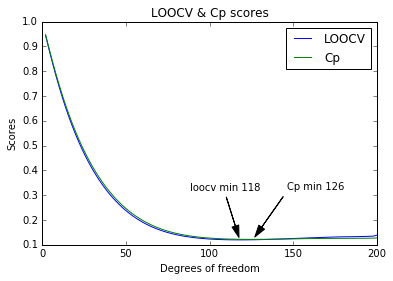

In [11]:
# Making a cool plot
lbtable.sort_values("freedom", inplace=True)
plt.plot(lbtable.ix[: ,["freedom"]], lbtable.ix[: ,["loocv", "Cp"]])
plt.xlabel('Degrees of freedom')
plt.ylabel('Scores')
plt.title('LOOCV & Cp scores')
plt.legend(labels=["LOOCV", "Cp"])
cpminFV = (lbtable.ix[lbtable['Cp'].idxmin(), "freedom"], 
           lbtable.ix[lbtable['Cp'].idxmin(), "Cp"])
loocvminFV = (lbtable.ix[lbtable['loocv'].idxmin(), "freedom"], 
              lbtable.ix[lbtable['loocv'].idxmin(), "loocv"])

plt.annotate('Cp min %s' % cpminFV[0] , xy=cpminFV, xytext=(cpminFV[0]+20, cpminFV[1]+0.2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.1, headwidth=7),
            )
plt.annotate('loocv min %s' % loocvminFV[0], xy=loocvminFV, xytext=(loocvminFV[0]-30, loocvminFV[1]+0.2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.1, headwidth=7),
            )
plt.show()
plt.close()

Cp score is tended to overestimate the quality of our model. But the more data we have the closer is Cp and LOOCV thea are assymptotically equal. It is so because of the calculation. When we have not large dataset we should use LOOCV.

In [12]:
# Training lasso
kf = cross_validation.KFold(N, n_folds=10, shuffle=True)
lasso = linear_model.LassoCV(n_alphas=100, eps=0.001, max_iter=1000, cv=kf, fit_intercept=False)
lasso.fit(X_train, y_train)
Coef=lasso.coef_
coeff = np.count_nonzero(Coef)
zero=len(Coef)-coeff
print("Number of non-zero coefficients: %0.0f, Number of zeros: %0.0f" % (coeff, zero))

Number of non-zero coefficients: 40, Number of zeros: 160


.

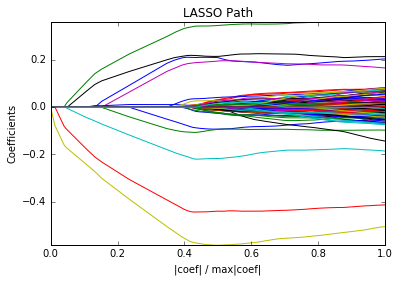

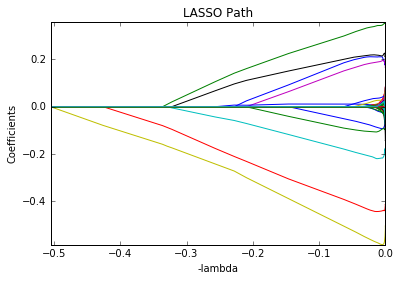

In [13]:
# More cool plots
alphas, _, coefs = linear_model.lars_path(X_train, y_train, method='lasso', eps=0.0001, verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()
plt.close()

# Even more 

xx = -alphas
plt.plot(xx, coefs.T)
plt.xlabel('-lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()
plt.close()
# The second one is not as cool as wanted

In [14]:
# best Ridge degree of freedom is 116
ols = Ridge()
ols.fit(X_train, y_train)
ridge = Ridge()
ridge.fit(X_train, y_train, freedom=116)
mean_sq_err_lasso_train = mean_squared_error(lasso.predict(X_train), y_train)
print("Estimating prediction risk on train data")
print("OutOfTheBox Lasso: {0: 5f} - mean_squared as there was some trouble with loocv for lasso".format(mean_sq_err_lasso_train))
print("Handmade    Ridge: {0: 5f}".format(ridge.scores()["loocv"]))
print("Handmade    OLS  : {0: 5f}".format(ols.scores()["loocv"]))

Estimating prediction risk on train data
OutOfTheBox Lasso:  0.092437 - mean_squared as there was some trouble with loocv for lasso
Handmade    Ridge:  0.119916
Handmade    OLS  :  0.139413


Even mean squared error is better with lasso!

In [15]:
mean_sq_err_lasso_test = mean_squared_error(lasso.predict(X_test), y_test)
print("Estimating prediction risk on test data")
print("OutOfTheBox Lasso: {0: 5f}".format(mean_sq_err_lasso_test))

Estimating prediction risk on test data
OutOfTheBox Lasso:  0.108649


Works fine!